In [251]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

# 1) Delivery_time -> Predict delivery time using sorting time

## Approach 1

In [252]:
df=pd.read_csv("delivery_time.csv")

In [253]:
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### First we will try to see whether the data is linear or not, if data is linear then only we can apply linear regression, also we will check the correlation between two

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

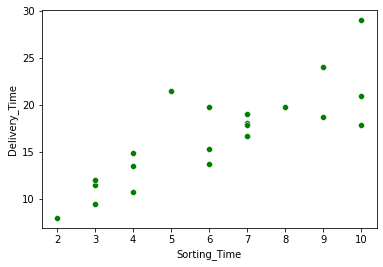

In [254]:
sns.scatterplot(x=df["Sorting_Time"], y=df["Delivery_Time"], color="green")

In [255]:
df.corr()          # To see the correlation between two variables

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


#### As we want to predict Delivery time from sorting time, we will consider
#### x= Sorting time
#### y= delivery time

In [256]:
x=np.array(df["Sorting_Time"])

In [257]:
x.ndim        # Here checking dimension of created array, as in model we want 2 dim array
print(f"The array x is {x.ndim} dimensional")

The array x is 1 dimensional


In [258]:
x.shape     # checking shape of the x array
print(f"The shape array x is {x.shape}")

The shape array x is (21,)


In [259]:
# as x is 1 Dimensional only, we will use reshape function to create 2-D array
x=x.reshape(-1,1)
print(f"The array x is {x.ndim} dimensional")
print(f"The shape array x is {x.shape}")

The array x is 2 dimensional
The shape array x is (21, 1)


In [260]:
y=np.array(df["Delivery_Time"]).reshape(-1,1)
print(f"The array y is {x.ndim} dimensional")
print(f"The shape array y is {x.shape}")

The array y is 2 dimensional
The shape array y is (21, 1)


In [261]:
# Creating test-train split such that 80% values will be used for training model, and 20% for testing
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

In [262]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))
x_test

16
5
16
5


array([[ 3],
       [ 2],
       [10],
       [ 9],
       [ 9]], dtype=int64)

In [263]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [264]:
y_predcted=model.predict(x_test)
y_predcted

array([[11.81010573],
       [10.06524229],
       [24.02414978],
       [22.27928634],
       [22.27928634]])

In [265]:
y_test

array([[ 9.5 ],
       [ 8.  ],
       [17.9 ],
       [18.75],
       [24.  ]])

In [266]:
model.score(x_test, y_test)

0.654064212860882

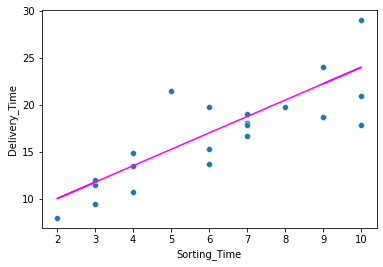

In [267]:
sns.scatterplot(x=df["Sorting_Time"],y=df["Delivery_Time"])
plt.plot(x_test,model.predict(x_test), color="magenta")
plt.show()

In [268]:
model.coef_    # Slope of the line

array([[1.74486344]])

In [269]:
model.intercept_   # y intercept of the line

array([6.57551542])

In [270]:
x_test[0:,0]

array([ 3,  2, 10,  9,  9], dtype=int64)

In [271]:
y_predicted= np.round(y_predcted,3)

In [272]:
x_test

array([[ 3],
       [ 2],
       [10],
       [ 9],
       [ 9]], dtype=int64)

In [273]:
# For saving the predicted and actual response in csv file
df_1= {"test_sorting_time" : x_test[0:,0], "Actual_Del_time":y_test[0:,0], "Predicted_del_time":y_predicted[0:,0]}
df_1= pd.DataFrame(df_1)
df_1.to_csv("Predicted_response.csv")
df_1.head()

,test_sorting_time,Actual_Del_time,Predicted_del_time
0,3,9.50,11.810
1,2,8.00,10.065
2,10,17.90,24.024
3,9,18.75,22.279
4,9,24.00,22.279


## By usig statsmodels library

In [274]:
import statsmodels.formula.api as smf

In [275]:
linear_model= smf.ols("y~x", data=df).fit()   #give y first as it depends on x

In [276]:
linear_model.params

Intercept    6.582734
x            1.649020
dtype: float64

In [277]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           3.98e-06
Time:                        11:33:43   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""